In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('khituong.csv')
df['Rain Avg'] = df['Rain Avg'].fillna(0)
df

,Time,Year,Month,Season,Station,Temp Avg,Rain Avg
0,1/1/1984,1984,1,dry,Dalat,15.7,35.4
1,1/2/1984,1984,2,dry,Dalat,16.8,0.0
2,1/3/1984,1984,3,dry,Dalat,17.8,77.8
3,1/4/1984,1984,4,dry,Dalat,19.2,96.4
4,1/5/1984,1984,5,rain,Dalat,19.5,178.3
...,...,...,...,...,...,...,...
1255,1/8/2013,2013,8,rain,Cattien,25.8,0.0
1256,1/9/2013,2013,9,rain,Cattien,25.7,0.0
1257,1/10/2013,2013,10,rain,Cattien,26.0,0.0
1258,1/11/2013,2013,11,dry,Cattien,26.0,0.0


In [13]:
df['Station'].unique()

array(['Dalat', 'Lienkhuong', 'Baoloc', 'Cattien'], dtype=object)

## Phân Tích Nhiệt Độ Theo Năm

In [4]:
df_DL = df[df['Station'] == 'Dalat']
df_DL.rename(columns={'Temp Avg' : 'Temp DL'}, inplace = True)
df_LK = df[df['Station'] == 'Lienkhuong']
df_LK.rename(columns={'Temp Avg' : 'Temp LK'},inplace = True)
df_BL = df[df['Station'] == 'Baoloc']
df_BL.rename(columns={'Temp Avg' : 'Temp BL'},inplace = True)
df_CT = df[df['Station'] == 'Cattien']
df_CT.rename(columns={'Temp Avg' : 'Temp CT'},inplace = True)

C:\Users\Hlegrind\AppData\Local\Temp\ipykernel_32416\2784752426.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DL.rename(columns={'Temp Avg' : 'Temp DL'}, inplace = True)
C:\Users\Hlegrind\AppData\Local\Temp\ipykernel_32416\2784752426.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LK.rename(columns={'Temp Avg' : 'Temp LK'},inplace = True)
C:\Users\Hlegrind\AppData\Local\Temp\ipykernel_32416\2784752426.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [5]:
df_LK

,Time,Year,Month,Season,Station,Temp LK,Rain Avg
408,1/1/1984,1984,1,dry,Lienkhuong,19.5,0.4
409,1/2/1984,1984,2,dry,Lienkhuong,20.5,0.0
410,1/3/1984,1984,3,dry,Lienkhuong,21.6,21.9
411,1/4/1984,1984,4,dry,Lienkhuong,23.0,202.3
412,1/5/1984,1984,5,rain,Lienkhuong,22.6,208.0
...,...,...,...,...,...,...,...
811,1/8/2017,2017,8,rain,Lienkhuong,22.8,196.8
812,1/9/2017,2017,9,rain,Lienkhuong,22.8,216.2
813,1/10/2017,2017,10,rain,Lienkhuong,21.9,335.4
814,1/11/2017,2017,11,dry,Lienkhuong,22.1,142.8


Nhiệt Độ Qua các năm

In [6]:
tem_year_DL = df_DL.loc[:,('Year','Temp DL')].groupby('Year').mean()['Temp DL'].to_frame()
tem_year_LK = df_LK.loc[:,('Year','Temp LK')].groupby('Year').mean()['Temp LK'].to_frame()
tem_year_BL = df_BL.loc[:,('Year','Temp BL')].groupby('Year').mean()['Temp BL'].to_frame()
tem_year_CT = df_CT.loc[:,('Year','Temp CT')].groupby('Year').mean()['Temp CT'].to_frame()

In [7]:
result = pd.concat([tem_year_DL,tem_year_LK,tem_year_BL,tem_year_CT], axis = 1)
result.fillna(0,inplace = True)
result.index.name = None
result['Year'] = result.index

In [8]:
result['Temp DL'] = pd.to_numeric(result['Temp DL'],downcast = 'float')
result['Temp BL'] = pd.to_numeric(result['Temp BL'],downcast = 'float')
result['Temp LK'] = pd.to_numeric(result['Temp LK'],downcast = 'float')
result['Temp CT'] = pd.to_numeric(result['Temp CT'],downcast = 'float')
result['Year'] = pd.to_numeric(result['Year'],downcast = 'integer')

In [9]:
YearList = result['Year'].tolist()
Temp_DL_List = result['Temp DL'].tolist()
Temp_BL_List = result['Temp BL'].tolist()
Temp_LK_List = result['Temp LK'].tolist()
Temp_CT_List = result['Temp CT'].tolist()

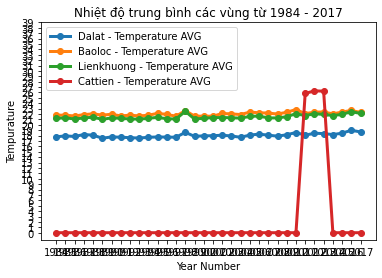

In [10]:
plt.plot(YearList, Temp_DL_List,   label = 'Dalat - Temperature AVG', marker='o', linewidth=3)
plt.plot(YearList, Temp_BL_List,   label = 'Baoloc - Temperature AVG',  marker='o', linewidth=3)
plt.plot(YearList, Temp_LK_List, label = 'Lienkhuong - Temperature AVG', marker='o', linewidth=3)
plt.plot(YearList, Temp_CT_List, label = 'Cattien - Temperature AVG', marker='o', linewidth=3)

import numpy as np
Temperature = np.arange(0, 40.0, 1)

plt.xlabel('Year Number')
plt.ylabel('Tempurature')
plt.legend(loc='upper left')
plt.xticks(YearList)
plt.yticks(Temperature)
plt.title('Nhiệt độ trung bình các vùng từ 1984 - 2017')
plt.show()

## Phân Tích Nhiệt Độ Theo Tháng

In [11]:
tem_month_DL = df_DL.loc[:,('Month','Temp DL')].groupby('Month').mean()['Temp DL'].to_frame()
tem_month_LK = df_LK.loc[:,('Month','Temp LK')].groupby('Month').mean()['Temp LK'].to_frame()
tem_month_BL = df_BL.loc[:,('Month','Temp BL')].groupby('Month').mean()['Temp BL'].to_frame()
tem_month_CT = df_CT.loc[:,('Month','Temp CT')].groupby('Month').mean()['Temp CT'].to_frame()

In [12]:
m_result = pd.concat([tem_month_DL,tem_month_LK,tem_month_BL,tem_month_CT], axis = 1)
m_result.fillna(0,inplace = True)
m_result.index.name = None
m_result['Month'] = m_result.index

In [13]:
m_result['Temp DL'] = pd.to_numeric(m_result['Temp DL'],downcast = 'float')
m_result['Temp BL'] = pd.to_numeric(m_result['Temp BL'],downcast = 'float')
m_result['Temp LK'] = pd.to_numeric(m_result['Temp LK'],downcast = 'float')
m_result['Temp CT'] = pd.to_numeric(m_result['Temp CT'],downcast = 'float')
m_result['Month'] = pd.to_numeric(m_result['Month'],downcast = 'integer')

In [14]:
MonthList = m_result['Month'].tolist()
Temp_m_DL_List = m_result['Temp DL'].tolist()
Temp_m_BL_List = m_result['Temp BL'].tolist()
Temp_m_LK_List = m_result['Temp LK'].tolist()
Temp_m_CT_List = m_result['Temp CT'].tolist()

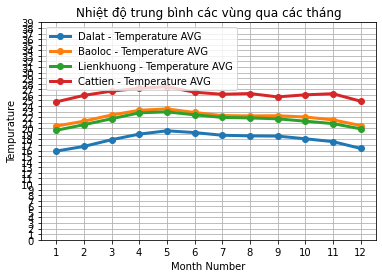

In [16]:
plt.plot(MonthList, Temp_m_DL_List,   label = 'Dalat - Temperature AVG', marker='o', linewidth=3)
plt.plot(MonthList, Temp_m_BL_List,   label = 'Baoloc - Temperature AVG',  marker='o', linewidth=3)
plt.plot(MonthList, Temp_m_LK_List, label = 'Lienkhuong - Temperature AVG', marker='o', linewidth=3)
plt.plot(MonthList, Temp_m_CT_List, label = 'Cattien - Temperature AVG', marker='o', linewidth=3)

import numpy as np
Temperature = np.arange(0, 40.0, 1)

plt.xlabel('Month Number')
plt.ylabel('Tempurature')
plt.legend(loc='upper left')
plt.grid()
plt.xticks(MonthList)
plt.yticks(Temperature)
plt.title('Nhiệt độ trung bình các vùng qua các tháng')
plt.show()

## Nhiệt Độ Theo Mùa

In [17]:
tem_season_DL = df_DL.loc[:,('Season','Temp DL')].groupby('Season').mean()['Temp DL'].to_frame()
tem_season_LK = df_LK.loc[:,('Season','Temp LK')].groupby('Season').mean()['Temp LK'].to_frame()
tem_season_BL = df_BL.loc[:,('Season','Temp BL')].groupby('Season').mean()['Temp BL'].to_frame()
tem_season_CT = df_CT.loc[:,('Season','Temp CT')].groupby('Season').mean()['Temp CT'].to_frame()

In [18]:
Season = pd.concat([tem_season_DL,tem_season_LK,tem_season_BL,tem_season_CT], axis = 1)
Season.fillna(0,inplace = True)
Season.index.name = None
Season['Season'] = Season.index
Season

,Temp DL,Temp LK,Temp BL,Temp CT,Season
dry,17.260784,20.917647,21.548039,25.922222,dry
rain,18.815686,22.024510,22.515196,26.316667,rain


In [19]:
Season['Temp DL'] = pd.to_numeric(Season['Temp DL'],downcast = 'float')
Season['Temp BL'] = pd.to_numeric(Season['Temp BL'],downcast = 'float')
Season['Temp LK'] = pd.to_numeric(Season['Temp LK'],downcast = 'float')
Season['Temp CT'] = pd.to_numeric(Season['Temp CT'],downcast = 'float')

In [20]:
tem_dry = Season.iloc[0].to_frame()
tem_rain = Season.iloc[1].to_frame()

In [21]:
Season_table = pd.concat([tem_dry,tem_rain],axis = 1)
Season_table.drop(Season_table.tail(1).index,inplace=True)
Season_table['dry'] = pd.to_numeric(Season_table['dry'],downcast = 'float')
Season_table['rain'] = pd.to_numeric(Season_table['rain'],downcast = 'float')

In [22]:
Place = ['DaLat','BaoLoc','LienKhuong','CatTien']
num = range(1,5)
dry = Season_table['dry'].tolist()
rain = Season_table['rain'].tolist()

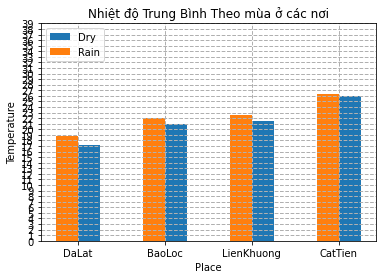

In [23]:
plt.bar(Place,dry, width= 0.25, label = 'Dry', align='edge')
plt.bar(Place, rain, width= -0.25, label = 'Rain', align='edge')
plt.xlabel('Place')
plt.ylabel('Temperature')
plt.legend(loc='upper left')
plt.grid(True, linewidth= 1, linestyle="--")
plt.title('Nhiệt độ Trung Bình Theo mùa ở các nơi')
plt.yticks(Temperature)
plt.show()

# Phân tích Theo Lượng Mưa

### Phân tích lượng mưa theo năm

C:\Users\Hlegrind\AppData\Local\Temp\ipykernel_32416\385734230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rain_DL.rename(columns={'Rain Avg' : 'Rain DL'}, inplace = True)
C:\Users\Hlegrind\AppData\Local\Temp\ipykernel_32416\385734230.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rain_LK.rename(columns={'Rain Avg' : 'Rain LK'},inplace = True)
C:\Users\Hlegrind\AppData\Local\Temp\ipykernel_32416\385734230.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

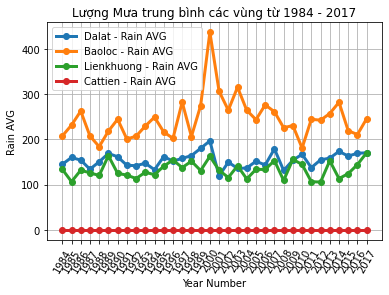

In [36]:

df_rain_DL = df[df['Station'] == 'Dalat']
df_rain_DL.rename(columns={'Rain Avg' : 'Rain DL'}, inplace = True)
df_rain_LK = df[df['Station'] == 'Lienkhuong']
df_rain_LK.rename(columns={'Rain Avg' : 'Rain LK'},inplace = True)
df_rain_BL = df[df['Station'] == 'Baoloc']
df_rain_BL.rename(columns={'Rain Avg' : 'Rain BL'},inplace = True)
df_rain_CT = df[df['Station'] == 'Cattien']
df_rain_CT.rename(columns={'Rain Avg' : 'Rain CT'},inplace = True)

Rain_year_DL = df_rain_DL.loc[:,('Year','Rain DL')].groupby('Year').mean()['Rain DL'].to_frame()
Rain_year_LK = df_rain_LK.loc[:,('Year','Rain LK')].groupby('Year').mean()['Rain LK'].to_frame()
Rain_year_BL = df_rain_BL.loc[:,('Year','Rain BL')].groupby('Year').mean()['Rain BL'].to_frame()
Rain_year_CT = df_rain_CT.loc[:,('Year','Rain CT')].groupby('Year').mean()['Rain CT'].to_frame()

r_result = pd.concat([Rain_year_DL, Rain_year_LK, Rain_year_BL, Rain_year_CT], axis = 1)
r_result.fillna(0,inplace = True)
r_result.index.name = None
r_result['Year'] = r_result.index

r_result['Rain DL'] = pd.to_numeric(r_result['Rain DL'],downcast = 'float')
r_result['Rain BL'] = pd.to_numeric(r_result['Rain BL'],downcast = 'float')
r_result['Rain LK'] = pd.to_numeric(r_result['Rain LK'],downcast = 'float')
r_result['Rain CT'] = pd.to_numeric(r_result['Rain CT'],downcast = 'float')
r_result['Year'] = pd.to_numeric(r_result['Year'],downcast = 'integer')

Year_r_List = r_result['Year'].tolist()
Rain_DL_List = r_result['Rain DL'].tolist()
Rain_BL_List = r_result['Rain BL'].tolist()
Rain_LK_List = r_result['Rain LK'].tolist()
Rain_CT_List = r_result['Rain CT'].tolist()

plt.plot(Year_r_List, Rain_DL_List,   label = 'Dalat - Rain AVG', marker='o', linewidth=3)
plt.plot(Year_r_List, Rain_BL_List,   label = 'Baoloc - Rain AVG',  marker='o', linewidth=3)
plt.plot(Year_r_List, Rain_LK_List, label = 'Lienkhuong - Rain AVG', marker='o', linewidth=3)
plt.plot(Year_r_List, Rain_CT_List, label = 'Cattien - Rain AVG', marker='o', linewidth=3)

plt.xlabel('Year Number')
plt.ylabel('Rain AVG')
plt.legend(loc='upper left')
plt.grid()
plt.xticks(Year_r_List, rotation = 60)
#plt.yticks(Temperature)
plt.title('Lượng Mưa trung bình các vùng từ 1984 - 2017')
plt.show()


### Phân tích lượng mưa theo tháng

C:\Users\Hlegrind\AppData\Local\Temp\ipykernel_32416\2405941730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rain_DL.rename(columns={'Rain Avg' : 'Rain DL'}, inplace = True)
C:\Users\Hlegrind\AppData\Local\Temp\ipykernel_32416\2405941730.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rain_LK.rename(columns={'Rain Avg' : 'Rain LK'},inplace = True)
C:\Users\Hlegrind\AppData\Local\Temp\ipykernel_32416\2405941730.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

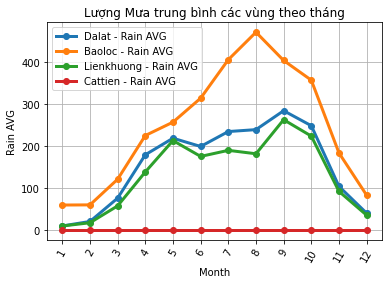

In [25]:

df_rain_DL = df[df['Station'] == 'Dalat']
df_rain_DL.rename(columns={'Rain Avg' : 'Rain DL'}, inplace = True)
df_rain_LK = df[df['Station'] == 'Lienkhuong']
df_rain_LK.rename(columns={'Rain Avg' : 'Rain LK'},inplace = True)
df_rain_BL = df[df['Station'] == 'Baoloc']
df_rain_BL.rename(columns={'Rain Avg' : 'Rain BL'},inplace = True)
df_rain_CT = df[df['Station'] == 'Cattien']
df_rain_CT.rename(columns={'Rain Avg' : 'Rain CT'},inplace = True)

Rain_m_DL = df_rain_DL.loc[:,('Month','Rain DL')].groupby('Month').mean()['Rain DL'].to_frame()
Rain_m_LK = df_rain_LK.loc[:,('Month','Rain LK')].groupby('Month').mean()['Rain LK'].to_frame()
Rain_m_BL = df_rain_BL.loc[:,('Month','Rain BL')].groupby('Month').mean()['Rain BL'].to_frame()
Rain_m_CT = df_rain_CT.loc[:,('Month','Rain CT')].groupby('Month').mean()['Rain CT'].to_frame()

r_m_result = pd.concat([Rain_m_DL, Rain_m_LK, Rain_m_BL, Rain_m_CT], axis = 1)
r_m_result.fillna(0,inplace = True)
r_m_result.index.name = None
r_m_result['Month'] = r_m_result.index

r_m_result['Rain DL'] = pd.to_numeric(r_m_result['Rain DL'],downcast = 'float')
r_m_result['Rain BL'] = pd.to_numeric(r_m_result['Rain BL'],downcast = 'float')
r_m_result['Rain LK'] = pd.to_numeric(r_m_result['Rain LK'],downcast = 'float')
r_m_result['Rain CT'] = pd.to_numeric(r_m_result['Rain CT'],downcast = 'float')
r_m_result['Month'] = pd.to_numeric(r_m_result['Month'],downcast = 'integer')

Month_r_List = r_m_result['Month'].tolist()
Rain_m_DL_List = r_m_result['Rain DL'].tolist()
Rain_m_BL_List = r_m_result['Rain BL'].tolist()
Rain_m_LK_List = r_m_result['Rain LK'].tolist()
Rain_m_CT_List = r_m_result['Rain CT'].tolist()

plt.plot(Month_r_List, Rain_m_DL_List,   label = 'Dalat - Rain AVG', marker='o', linewidth=3)
plt.plot(Month_r_List, Rain_m_BL_List,   label = 'Baoloc - Rain AVG',  marker='o', linewidth=3)
plt.plot(Month_r_List, Rain_m_LK_List, label = 'Lienkhuong - Rain AVG', marker='o', linewidth=3)
plt.plot(Month_r_List, Rain_m_CT_List, label = 'Cattien - Rain AVG', marker='o', linewidth=3)

plt.xlabel('Month')
plt.ylabel('Rain AVG')
plt.legend(loc='upper left')
plt.grid()
plt.xticks(Month_r_List, rotation = 60)
#plt.yticks(Temperature)
plt.title('Lượng Mưa trung bình các vùng theo tháng')
plt.show()

### Phân Tích lượng mưa trung bình theo mùa

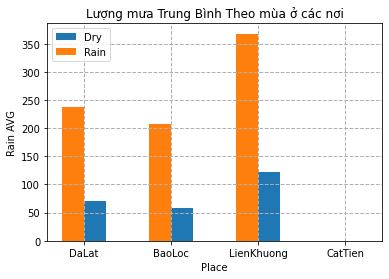

In [26]:
Rain_season_DL = df_rain_DL.loc[:,('Season','Rain DL')].groupby('Season').mean()['Rain DL'].to_frame()
Rain_season_LK = df_rain_LK.loc[:,('Season','Rain LK')].groupby('Season').mean()['Rain LK'].to_frame()
Rain_season_BL = df_rain_BL.loc[:,('Season','Rain BL')].groupby('Season').mean()['Rain BL'].to_frame()
Rain_season_CT = df_rain_CT.loc[:,('Season','Rain CT')].groupby('Season').mean()['Rain CT'].to_frame()

Season_rain = pd.concat([Rain_season_DL, Rain_season_LK, Rain_season_BL, Rain_season_CT], axis = 1)
Season_rain.fillna(0,inplace = True)
Season_rain.index.name = None
Season_rain['Season'] = Season_rain.index

Season_rain['Rain DL'] = pd.to_numeric(Season_rain['Rain DL'],downcast = 'float')
Season_rain['Rain BL'] = pd.to_numeric(Season_rain['Rain BL'],downcast = 'float')
Season_rain['Rain LK'] = pd.to_numeric(Season_rain['Rain LK'],downcast = 'float')
Season_rain['Rain CT'] = pd.to_numeric(Season_rain['Rain CT'],downcast = 'float')

Rain_dry = Season_rain.iloc[0].to_frame()
Rain_rain = Season_rain.iloc[1].to_frame()

Season_table_rain = pd.concat([Rain_dry,Rain_rain],axis = 1)
Season_table_rain.drop(Season_table_rain.tail(1).index,inplace=True)
Season_table_rain['dry'] = pd.to_numeric(Season_table_rain['dry'],downcast = 'float')
Season_table_rain['rain'] = pd.to_numeric(Season_table_rain['rain'],downcast = 'float')

Place = ['DaLat','BaoLoc','LienKhuong','CatTien']

dry = Season_table_rain['dry'].tolist()
rain = Season_table_rain['rain'].tolist()

plt.bar(Place, dry, width= 0.25, label = 'Dry', align='edge')
plt.bar(Place, rain, width= -0.25, label = 'Rain', align='edge')
plt.xlabel('Place')
plt.ylabel('Rain AVG')
plt.legend(loc='upper left')
plt.grid(True, linewidth= 1, linestyle="--")
plt.title('Lượng mưa Trung Bình Theo mùa ở các nơi')
#plt.yticks(num)
plt.show()

# Phân tích mối tương quan giữa nhiệt độ và độ ẩm

In [46]:
temp_rain_month_DL = pd.concat([tem_month_DL, Rain_m_DL],axis =1 )
temp_rain_month_DL.fillna(0,inplace = True)
temp_rain_month_DL.index.name = None
temp_rain_month_DL['Month'] = temp_rain_month_DL.index
temp_rain_month_DL[['Temp DL','Rain DL']].corr()

,Temp DL,Rain DL
Temp DL,1.000000,0.842432
Rain DL,0.842432,1.000000


In [62]:
temp_rain_month_DL['Temp DL'] = pd.to_numeric(temp_rain_month_DL['Temp DL'], downcast = 'integer')
temp_rain_month_DL['Rain DL'] = pd.to_numeric(temp_rain_month_DL['Rain DL'], downcast = 'integer')

Phân tích mối quan hệ theo tháng

In [79]:
Rain_month = df.loc[:,('Month','Rain Avg')].groupby('Month').mean()['Rain Avg']
Temp_month = df.loc[:,('Month','Temp Avg')].groupby('Month').mean()['Temp Avg']

In [81]:
Rain_Temp = pd.concat([Rain_month,Temp_month],axis = 1)
Rain_Temp.fillna(0,inplace = True)
Rain_Temp.index.name = None
Rain_Temp['Month']=Rain_Temp.index
Rain_Temp[['Rain Avg','Temp Avg']].corr()

,Rain Avg,Temp Avg
Rain Avg,1.000000,0.711746
Temp Avg,0.711746,1.000000


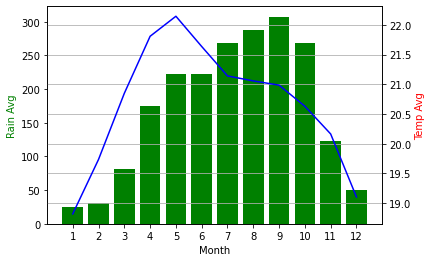

In [78]:
Months = range(1,13)
x = Months
y1 = Rain_month
y2 = Temp_month
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(x,y1, color = 'g')
ax2.plot(x, y2, 'b-')
ax1.set_xlabel('Month')
ax1.set_ylabel('Rain Avg', color='g')
ax2.set_ylabel('Temp Avg', color ='r')
plt.xticks(Months)
plt.grid()
plt.show()